<a href="https://colab.research.google.com/github/saim-glitch/Freelancing/blob/main/Depression_Twitter_%7C_ML_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji
!pip install catboost
!pip install gensim
!pip install --upgrade numpy gensim --force-reinstall

  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.3.0.post1-py3-none-any.whl.metadata (24 kB)
Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1

In [2]:
import re     # Regular expressions for text processing
import os     # OS operations like file path handling
import emoji  # Processing emojis in text
from collections import Counter  # Counting hashable objects

# For numerical operations and data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # To create word cloud visualizations

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords            # List of stopwords for filtering text
from nltk.tokenize import word_tokenize      # Tokenization: splitting text into words
from nltk.sentiment import SentimentIntensityAnalyzer  # VADER sentiment analyzer

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# For encoding categorical labels into numeric format
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize  # For multi-label binarization

#
from sklearn.feature_extraction.text import TfidfVectorizer

#
from gensim.models import Word2Vec

# Machine learning
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

# For evaluation metrics: ROC AUC, ROC curve, confusion matrix, classification report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [3]:
df = pd.read_csv("/content/Mental-Health-Twitter.csv")
df

Unnamed: 0             post_id                    post_created  \
0               0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1               1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2               2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3               3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4               4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
...           ...                 ...                             ...   
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
0      It's just over 2 years since I was diagnosed w...  1013187241   
1      It's Sunday, I need a break, so I'm planning t...  1013187241   
2      Awake but tired. I need to sleep but my brain ...  1013187241   
3      RT @SewHQ: #Retro bears make perfect gifts and...  1013187241   
4      It’s hard to say whether packing lists are mak...  1013187241   
...                                                  ...         ...   
19995              A day without sunshine is like night.  1169875706   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...  1169875706   
19997  The flow chart is a most thoroughly oversold p...  1169875706   
19998  Ships are safe in harbor, but they were never ...  1169875706   
19999     Black holes are where God is dividing by zero.  1169875706   

       followers  friends  favourites  statuses  retweets  label  
0             84      211         251       837         0      1  
1             84      211         251       837         1      1  
2             84      211         251       837         0      1  
3             84      211         251       837         2      1  
4             84      211         251       837         1      1  
...          ...      ...         ...       ...       ...    ...  
19995        442      230           7   1063601         0      0  
19996        442      230           7   1063601         0      0  
19997        442      230           7   1063601         0      0  
19998        442      230           7   1063601         0      0  
19999        442      230           7   1063601         0      0  

[20000 rows x 11 columns]

In [4]:
df.head()

Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837         0      1  
1      211         251       837         1      1  
2      211         251       837         0      1  
3      211         251       837         2      1  
4      211         251       837         1      1

In [5]:
df.tail()

Unnamed: 0             post_id                    post_created  \
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
19995              A day without sunshine is like night.  1169875706   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...  1169875706   
19997  The flow chart is a most thoroughly oversold p...  1169875706   
19998  Ships are safe in harbor, but they were never ...  1169875706   
19999     Black holes are where God is dividing by zero.  1169875706   

       followers  friends  favourites  statuses  retweets  label  
19995        442      230           7   1063601         0      0  
19996        442      230           7   1063601         0      0  
19997        442      230           7   1063601         0      0  
19998        442      230           7   1063601         0      0  
19999        442      230           7   1063601         0      0

In [6]:
df.shape

(20000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [8]:
df.dtypes

Unnamed: 0       int64
post_id          int64
post_created    object
post_text       object
user_id          int64
followers        int64
friends          int64
favourites       int64
statuses         int64
retweets         int64
label            int64
dtype: object

In [9]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')       # Common stopwords for filtering text
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# Alternative function to remove emojis using regex (works without the 'emoji' library)
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Function for general text preprocessing
def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove URLs from the text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove emojis from the text
    text = remove_emojis(text)

    # 4. Remove punctuation and special characters, keep only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Tokenize the text into words
    tokens = word_tokenize(text)

    # 6. Remove English stopwords from the tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w not in stop_words]

    # 7. Join tokens back into a single cleaned string
    cleaned_text = " ".join(filtered_tokens)

    return cleaned_text

In [11]:
df['cleaned_review'] = df['post_text'].astype(str).apply(preprocess_text)

In [12]:
print(df[['post_text', 'cleaned_review']].head(n=20))

                                            post_text  \
0   It's just over 2 years since I was diagnosed w...   
1   It's Sunday, I need a break, so I'm planning t...   
2   Awake but tired. I need to sleep but my brain ...   
3   RT @SewHQ: #Retro bears make perfect gifts and...   
4   It’s hard to say whether packing lists are mak...   
5   Making packing lists is my new hobby... #movin...   
6   At what point does keeping stuff for nostalgic...   
7   Currently in the finding-boxes-of-random-shit ...   
8   Can't be bothered to cook, take away on the wa...   
9   RT @itventsnews: ITV releases promo video for ...   
10  ... also, I have too much stuff. Way, way too ...   
11  I never want to put one of these together agai...   
12  Moving stuff is bloomin’ knackering... and the...   
13  Back at the house, moving stuff. It’s so peace...   
14  Urgh. Anxiety. FFS where does it come from?! (...   
15  I have too much stuff. Way, way too much... Ma...   
16  Hideous traffic on the A14.

In [13]:
df = df.drop(columns=['Unnamed: 0', 'post_id', 'post_created', 'user_id'])

# Check the remaining columns
print(df.columns)

Index(['post_text', 'followers', 'friends', 'favourites', 'statuses',
       'retweets', 'label', 'cleaned_review'],
      dtype='object')


In [14]:
print(df.isnull().sum())

post_text         0
followers         0
friends           0
favourites        0
statuses          0
retweets          0
label             0
cleaned_review    0
dtype: int64


In [15]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [post_text, followers, friends, favourites, statuses, retweets, label, cleaned_review]
Index: []


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_text       20000 non-null  object
 1   followers       20000 non-null  int64 
 2   friends         20000 non-null  int64 
 3   favourites      20000 non-null  int64 
 4   statuses        20000 non-null  int64 
 5   retweets        20000 non-null  int64 
 6   label           20000 non-null  int64 
 7   cleaned_review  20000 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.2+ MB
None


In [17]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER compound score
def vader_sentiment_classify(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Calculate and add the compound sentiment score for each cleaned review
df['compound_score'] = df['cleaned_review'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Apply the function on the cleaned text (or original text if preferred)
df['vader_sentiment'] = df['cleaned_review'].astype(str).apply(vader_sentiment_classify)

# Display the first 10 rows of cleaned reviews and their corresponding VADER sentiment labels
print(df[['cleaned_review', 'vader_sentiment']].head(n=20))

                                       cleaned_review vader_sentiment
0   years since diagnosed anxiety depression today...        negative
1   sunday need break im planning spend little tim...         neutral
2                  awake tired need sleep brain ideas        negative
3   rt sewhq retro bears make perfect gifts great ...        positive
4   hard say whether packing lists making life eas...        positive
5          making packing lists new hobby movinghouse         neutral
6   point keeping stuff nostalgic reasons cross li...         neutral
7   currently findingboxesofrandomshit packing pha...         neutral
8               cant bothered cook take away way lazy        negative
9   rt itventsnews itv releases promo video final ...         neutral
10           also much stuff way way much movinghouse         neutral
11   never want put one together lotharderthanitlooks        negative
12  moving stuff bloomin knackering theres still l...         neutral
13                  

In [18]:
# Display the first 20 rows of cleaned reviews and their compound sentiment scores
print(df[['cleaned_review', 'compound_score']].head(n=20))

                                       cleaned_review  compound_score
0   years since diagnosed anxiety depression today...         -0.6597
1   sunday need break im planning spend little tim...          0.0000
2                  awake tired need sleep brain ideas         -0.4404
3   rt sewhq retro bears make perfect gifts great ...          0.9042
4   hard say whether packing lists making life eas...          0.1779
5          making packing lists new hobby movinghouse          0.0000
6   point keeping stuff nostalgic reasons cross li...          0.0000
7   currently findingboxesofrandomshit packing pha...          0.0000
8               cant bothered cook take away way lazy         -0.1376
9   rt itventsnews itv releases promo video final ...          0.0000
10           also much stuff way way much movinghouse          0.0000
11   never want put one together lotharderthanitlooks         -0.0572
12  moving stuff bloomin knackering theres still l...          0.0000
13                  

In [19]:
def tokenize_text(text):
    # Convert text to lowercase and tokenize into words
    tokens = word_tokenize(text.lower())  # lowercase for uniformity
    return tokens

# Apply the tokenization function to the 'cleaned_review' column,
# creating a new 'tokens' column in the dataframe
df['tokens'] = df['cleaned_review'].astype(str).apply(tokenize_text)

In [20]:
print(df[['cleaned_review', 'tokens']].head(n=10))

                                      cleaned_review  \
0  years since diagnosed anxiety depression today...   
1  sunday need break im planning spend little tim...   
2                 awake tired need sleep brain ideas   
3  rt sewhq retro bears make perfect gifts great ...   
4  hard say whether packing lists making life eas...   
5         making packing lists new hobby movinghouse   
6  point keeping stuff nostalgic reasons cross li...   
7  currently findingboxesofrandomshit packing pha...   
8              cant bothered cook take away way lazy   
9  rt itventsnews itv releases promo video final ...   

                                              tokens  
0  [years, since, diagnosed, anxiety, depression,...  
1  [sunday, need, break, im, planning, spend, lit...  
2          [awake, tired, need, sleep, brain, ideas]  
3  [rt, sewhq, retro, bears, make, perfect, gifts...  
4  [hard, say, whether, packing, lists, making, l...  
5  [making, packing, lists, new, hobby, movinghouse] 

In [21]:
df['tokens'] = df['cleaned_review'].astype(str).apply(lambda x: x.split())

# View
df[['cleaned_review', 'tokens']].head(n=20)

cleaned_review  \
0   years since diagnosed anxiety depression today...   
1   sunday need break im planning spend little tim...   
2                  awake tired need sleep brain ideas   
3   rt sewhq retro bears make perfect gifts great ...   
4   hard say whether packing lists making life eas...   
5          making packing lists new hobby movinghouse   
6   point keeping stuff nostalgic reasons cross li...   
7   currently findingboxesofrandomshit packing pha...   
8               cant bothered cook take away way lazy   
9   rt itventsnews itv releases promo video final ...   
10           also much stuff way way much movinghouse   
11   never want put one together lotharderthanitlooks   
12  moving stuff bloomin knackering theres still l...   
13                   back house moving stuff peaceful   
14                      urgh anxiety ffs come breathe   
15          much stuff way way much massive purge way   
16  hideous traffic must remember pay closer atten...   
17                         packing purging feels good   
18             bampq looking internal doors fun times   
19                time get many things busy day ahead   

                                               tokens  
0   [years, since, diagnosed, anxiety, depression,...  
1   [sunday, need, break, im, planning, spend, lit...  
2           [awake, tired, need, sleep, brain, ideas]  
3   [rt, sewhq, retro, bears, make, perfect, gifts...  
4   [hard, say, whether, packing, lists, making, l...  
5   [making, packing, lists, new, hobby, movinghouse]  
6   [point, keeping, stuff, nostalgic, reasons, cr...  
7   [currently, findingboxesofrandomshit, packing,...  
8       [cant, bothered, cook, take, away, way, lazy]  
9   [rt, itventsnews, itv, releases, promo, video,...  
10   [also, much, stuff, way, way, much, movinghouse]  
11  [never, want, put, one, together, lothardertha...  
12  [moving, stuff, bloomin, knackering, theres, s...  
13             [back, house, moving, stuff, peaceful]  
14                [urgh, anxiety, ffs, come, breathe]  
15  [much, stuff, way, way, much, massive, purge, ...  
16  [hideous, traffic, must, remember, pay, closer...  
17                    [packing, purging, feels, good]  
18      [bampq, looking, internal, doors, fun, times]  
19        [time, get, many, things, busy, day, ahead]

/tmp/ipython-input-261876738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="vader_sentiment", data=df, palette=palette)


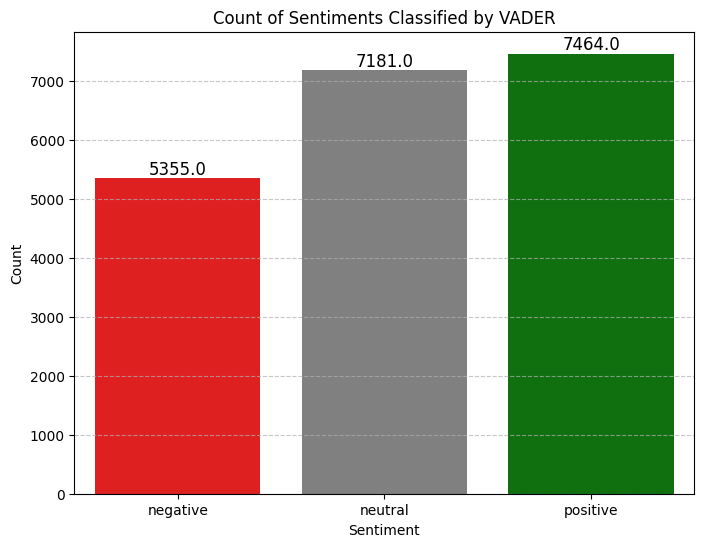

In [22]:
plt.figure(figsize=(8,6))
palette = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}
ax = sns.countplot(x="vader_sentiment", data=df, palette=palette)
plt.title('Count of Sentiments Classified by VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [23]:
def get_text_by_sentiment(df, sentiment_label):
    texts = df[df['vader_sentiment'] == sentiment_label]['cleaned_review'].dropna()
    return " ".join(texts)

# Generate and display a word cloud from the provided text with a title
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Get combined text for each sentiment category
text_neg = get_text_by_sentiment(df, 'negative')
text_pos = get_text_by_sentiment(df, 'positive')
text_neu = get_text_by_sentiment(df, 'neutral')

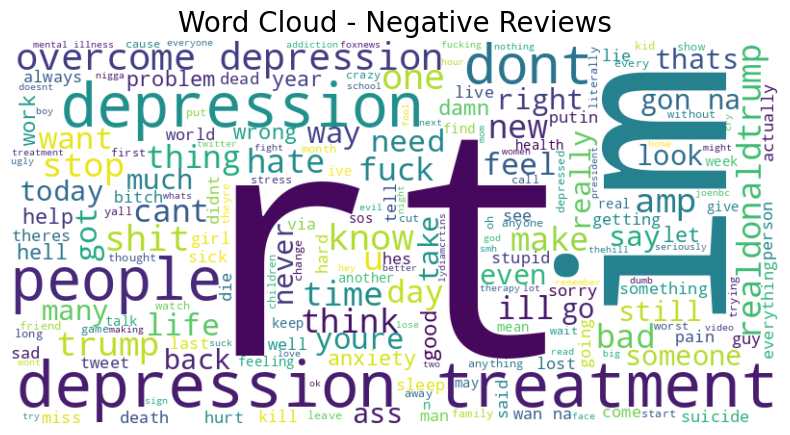

In [24]:
plot_wordcloud(text_neg, 'Word Cloud - Negative Reviews')

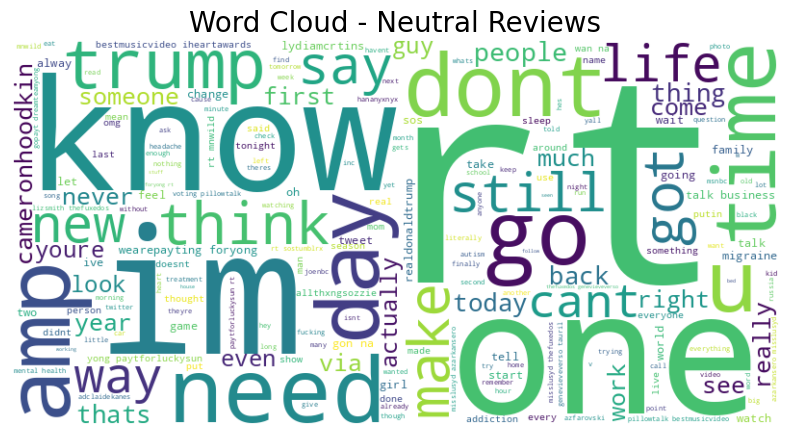

In [25]:
plot_wordcloud(text_neu, 'Word Cloud - Neutral Reviews')

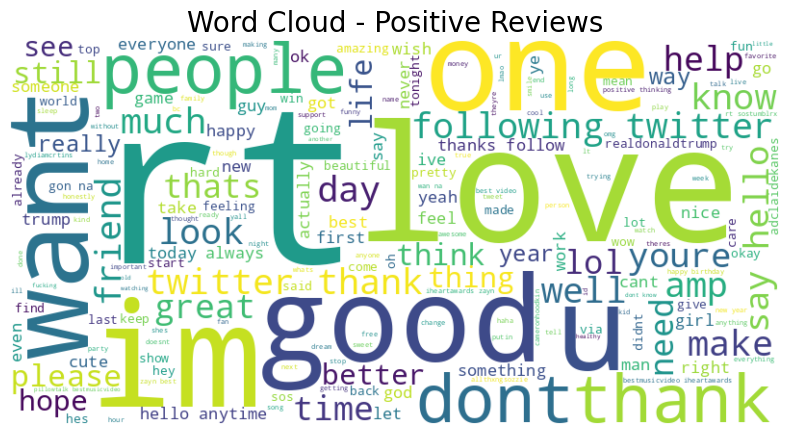

In [26]:
plot_wordcloud(text_pos, 'Word Cloud - Positive Reviews')

/tmp/ipython-input-260504768.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Set2')


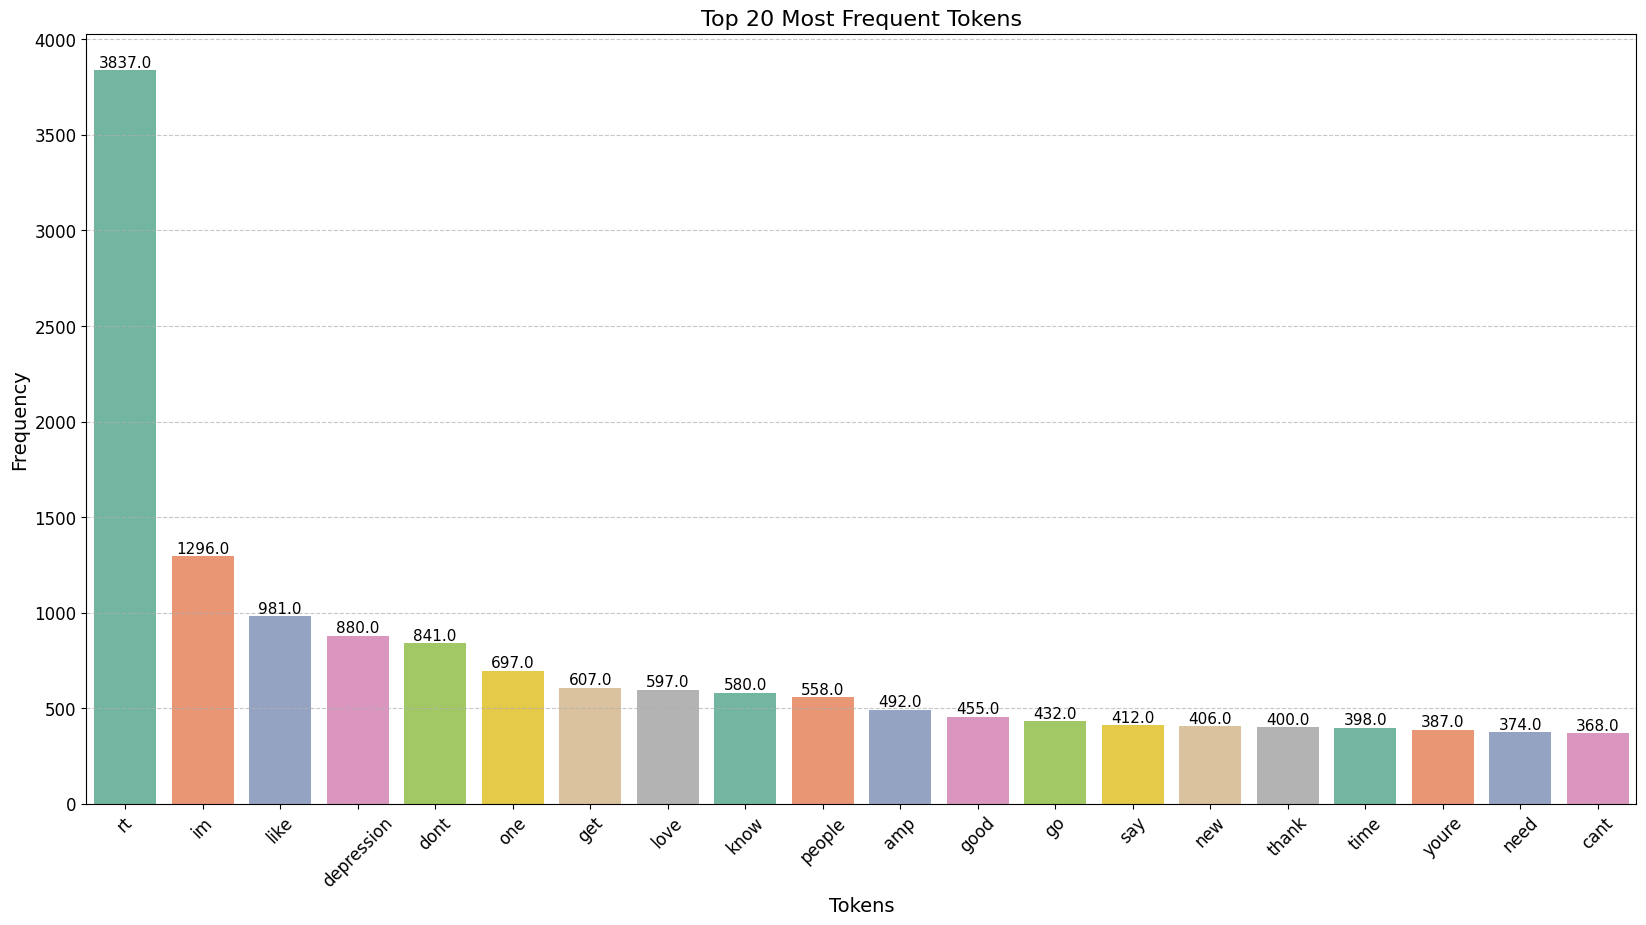

In [27]:
from collections import Counter

# Assuming you already have a 'tokens' column with lists of words
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Count frequency of each token
token_counts = Counter(all_tokens)

# Select the 20 most common tokens
most_common_tokens = token_counts.most_common(20)

# Separate words and counts for plotting
words, counts = zip(*most_common_tokens)

# Plot the bar chart
plt.figure(figsize=(20,10))
sns.barplot(x=list(words), y=list(counts), palette='Set2')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 20 Most Frequent Tokens', fontsize=16)
plt.xlabel('Tokens', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)


/tmp/ipython-input-1538771840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=ax, palette=palette)
/tmp/ipython-input-1538771840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=ax, palette=palette)


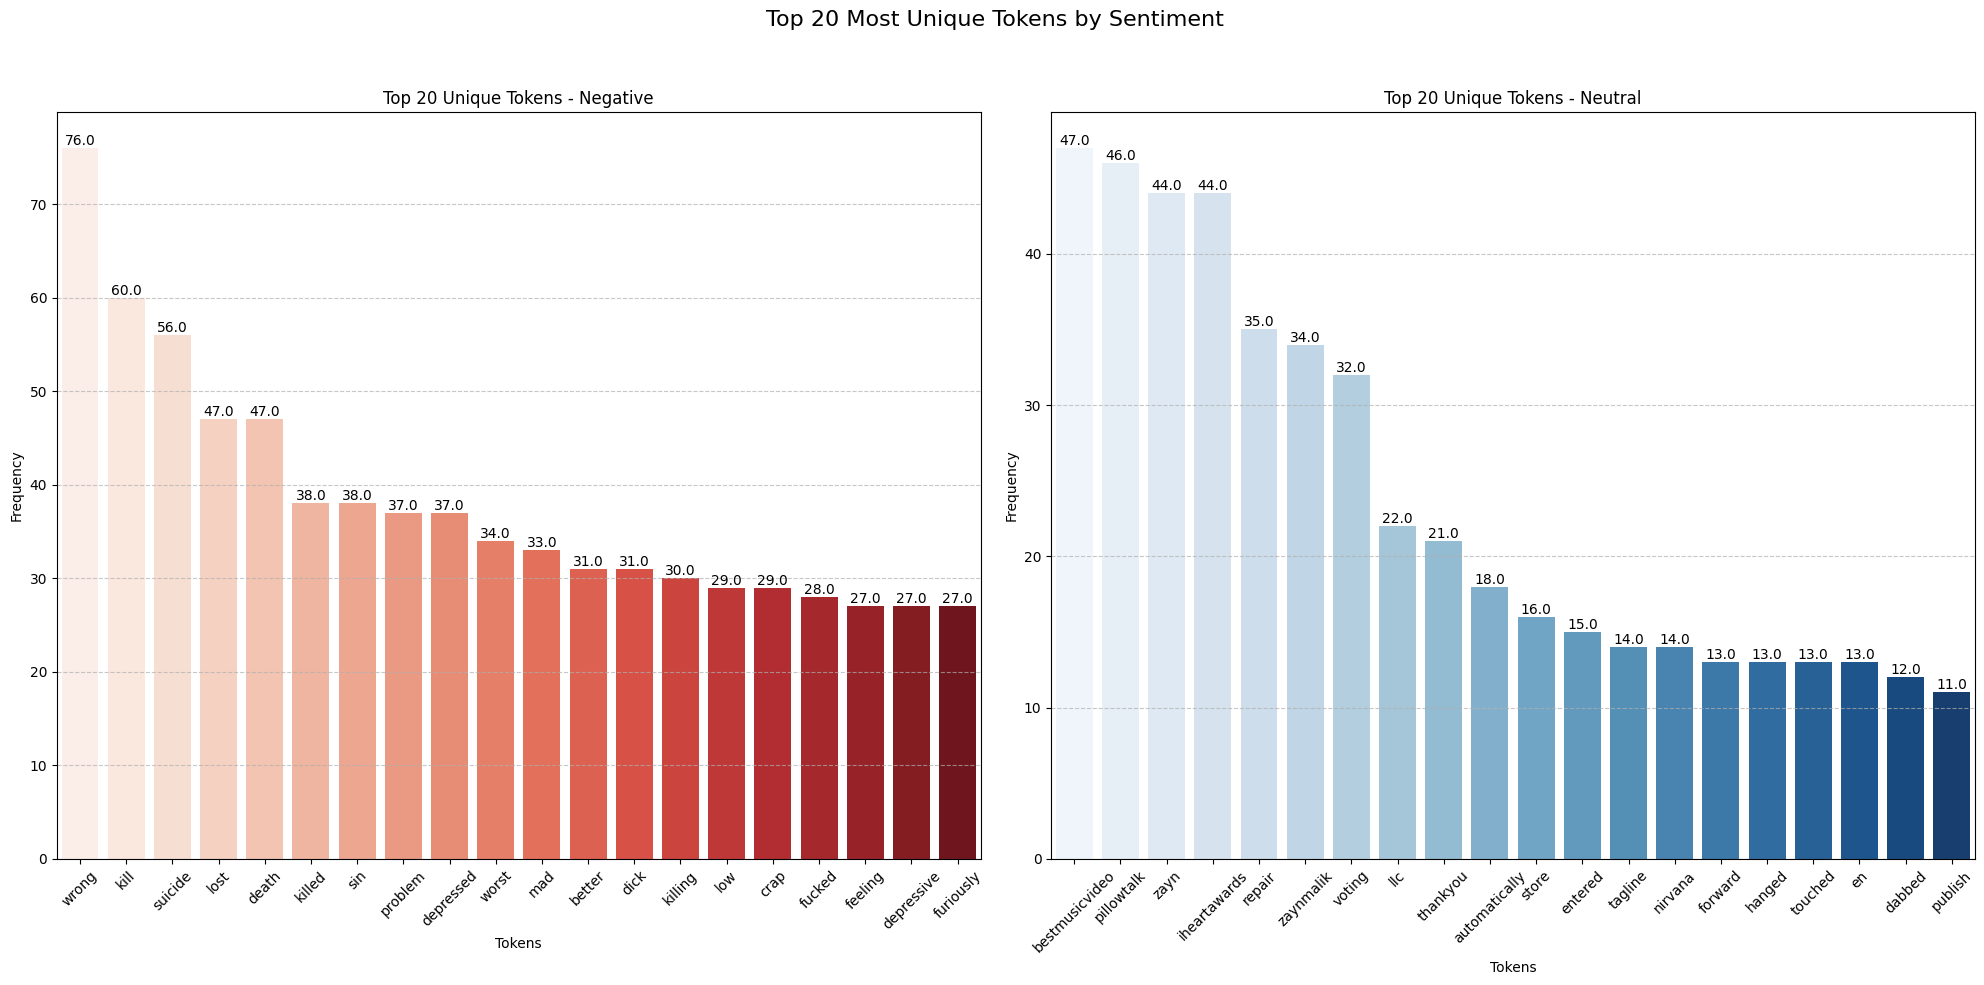

In [28]:
def plot_unique_top_tokens(df, target_sentiment, other_sentiments, top_n=20, ax=None, palette='Blues'):

    # All tokens for the target sentiment
    target_tokens = [token for sublist in df[df['vader_sentiment'] == target_sentiment]['tokens'] for token in sublist]

    # All tokens for the other sentiment(s)
    other_tokens = set(token for sublist in df[df['vader_sentiment'].isin(other_sentiments)]['tokens'] for token in sublist)

    # Keep only tokens that are not in other sentiments
    unique_tokens = [token for token in target_tokens if token not in other_tokens]
    token_counts = Counter(unique_tokens)
    most_common = token_counts.most_common(top_n)
    if most_common:
        words, counts = zip(*most_common)
        sns.barplot(x=list(words), y=list(counts), ax=ax, palette=palette)
        ax.set_title(f'Top {top_n} Unique Tokens - {target_sentiment.capitalize()}')
        ax.set_xlabel('Tokens')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        # Annotate bars
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10)
    else:
        ax.set_title(f'No unique tokens for {target_sentiment}')

# Exemplo de uso:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plot_unique_top_tokens(df, 'negative', ['neutral'], ax=axes[0], palette='Reds')
plot_unique_top_tokens(df, 'neutral', ['negative'], ax=axes[1], palette='Blues')
plt.suptitle('Top 20 Most Unique Tokens by Sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipython-input-1538771840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=ax, palette=palette)


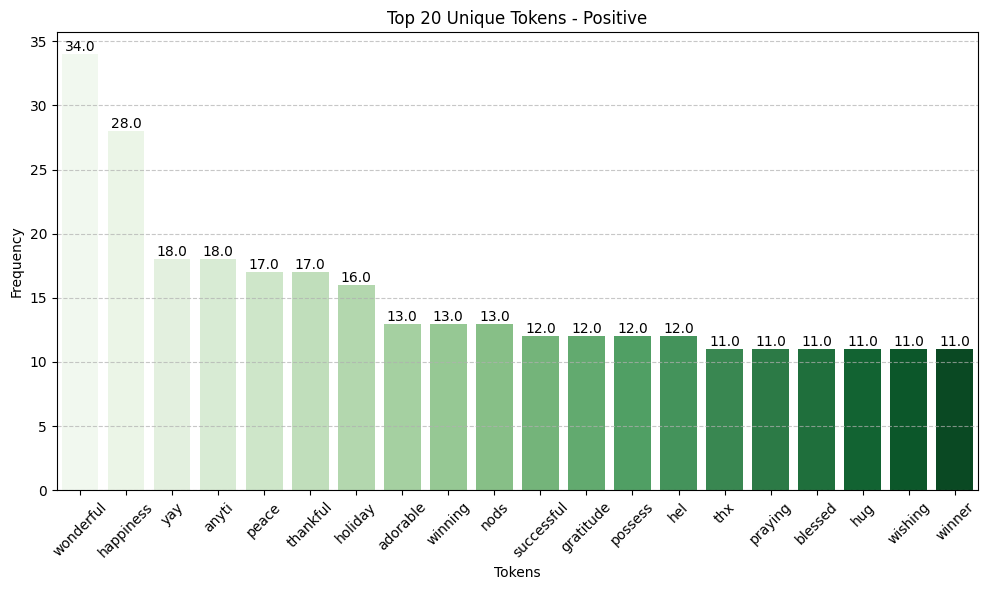

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_unique_top_tokens(df, 'positive', ['neutral', 'negative'], ax=ax, palette='Greens')
plt.title('Top 20 Unique Tokens - Positive')
plt.tight_layout()
plt.show()

      followers                                                              \
          count      mean          std   min    25%    50%     75%      max   
label                                                                         
0       10000.0  921.7259   834.235466  11.0  235.0  640.0  1849.0   3088.0   
1       10000.0  879.2420  2553.988211   0.0  177.0  434.0   914.0  28614.0   

       friends             ... statuses            retweets             \
         count       mean  ...      75%        max    count       mean   
label                      ...                                           
0      10000.0   562.5893  ...  61856.0  1063601.0  10000.0  1818.8960   
1      10000.0  1002.2682  ...  13251.0    32925.0  10000.0  1056.9586   

                                                   
                std  min  25%  50%  75%       max  
label                                              
0      18794.064856  0.0  0.0  0.0  1.0  839540.0  
1      10184.509419  0.0 

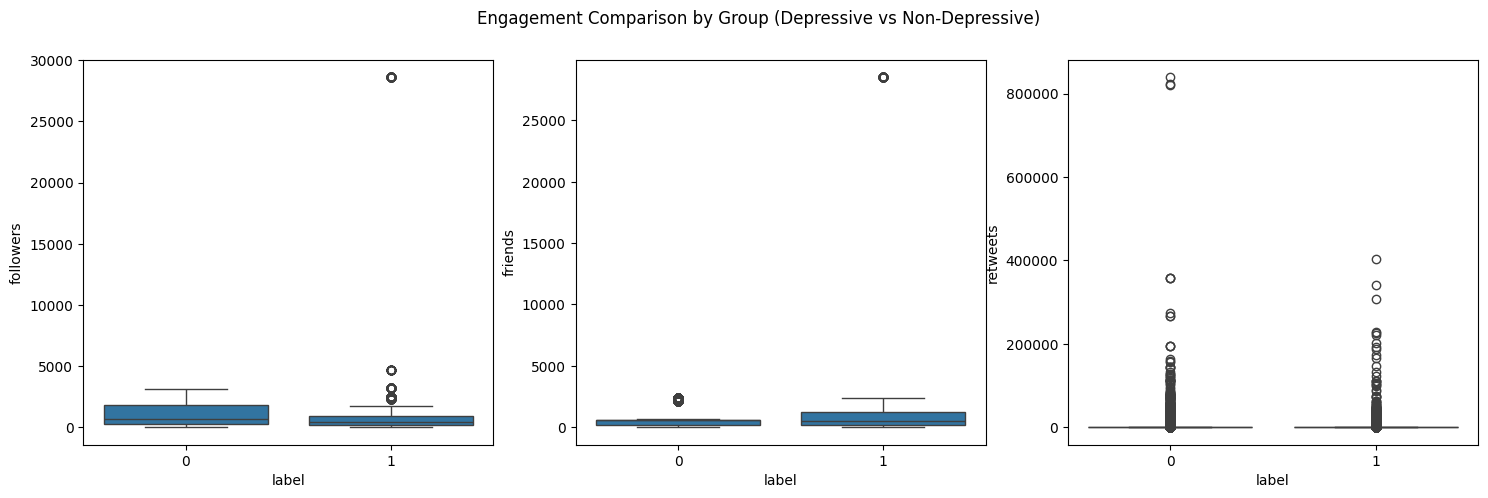

In [30]:
print(df.groupby('label')[['followers', 'friends', 'favourites', 'statuses', 'retweets']].describe())

# Boxplots comparing engagement metrics by group
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, x='label', y='followers', ax=axs[0])
sns.boxplot(data=df, x='label', y='friends', ax=axs[1])
sns.boxplot(data=df, x='label', y='retweets', ax=axs[2])
plt.suptitle('Engagement Comparison by Group (Depressive vs Non-Depressive)')
plt.show()

/tmp/ipython-input-1390004294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label_group', y='compound_score', palette='Set2')


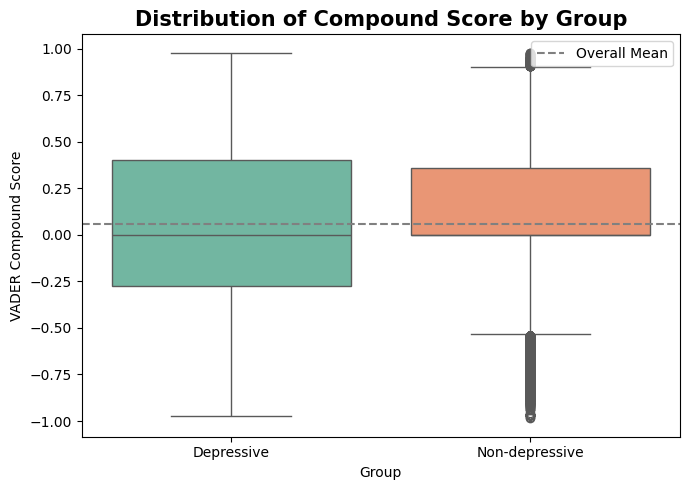

In [31]:
# Optional: Map label to more descriptive names
label_map = {0: 'Non-depressive', 1: 'Depressive'}
df['label_group'] = df['label'].map(label_map)

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='label_group', y='compound_score', palette='Set2')
plt.axhline(df['compound_score'].mean(), color='gray', ls='--', label='Overall Mean')
plt.title('Distribution of Compound Score by Group', fontsize=15, fontweight='bold')
plt.xlabel('Group')
plt.ylabel('VADER Compound Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

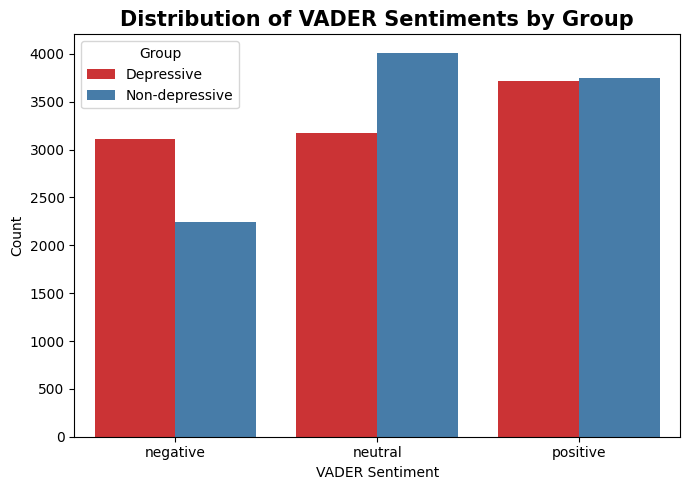

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='vader_sentiment', hue='label_group', palette='Set1')
plt.title('Distribution of VADER Sentiments by Group', fontsize=15, fontweight='bold')
plt.xlabel('VADER Sentiment')
plt.ylabel('Count')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1799101974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='retweets', palette='Set2')


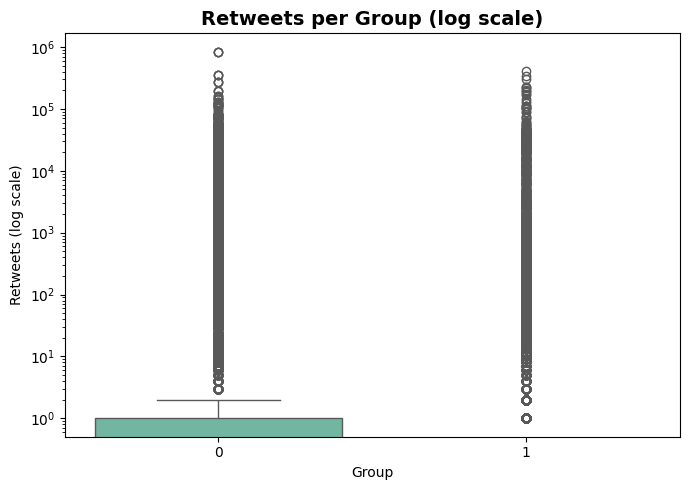

In [33]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='label', y='retweets', palette='Set2')
plt.yscale('log')
plt.title('Retweets per Group (log scale)', fontsize=14, fontweight='bold')
plt.xlabel('Group')
plt.ylabel('Retweets (log scale)')
plt.tight_layout()
plt.show()

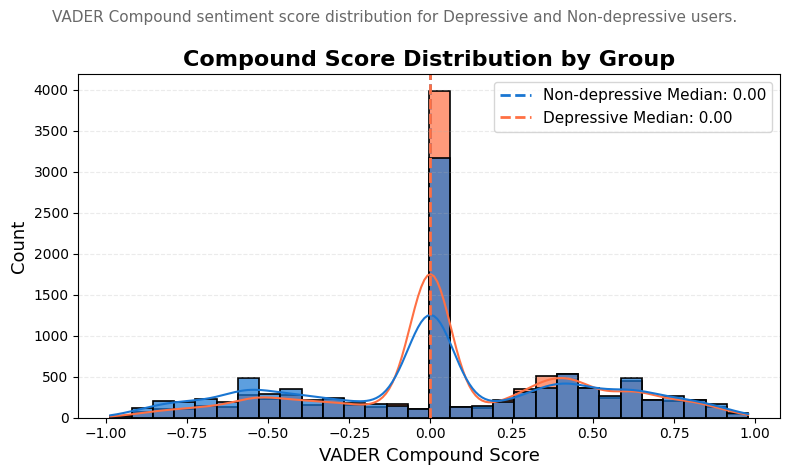

In [34]:
label_map = {0: 'Non-depressive', 1: 'Depressive'}
df['label_group'] = df['label'].map(label_map)

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='compound_score',
    hue='label_group',
    kde=True,
    bins=30,
    palette=['#1976d2', '#ff7043'],
    alpha=0.7,
    linewidth=1.2
)

# Adiciona linhas de mediana para cada grupo
for group, color in zip(['Non-depressive', 'Depressive'], ['#1976d2', '#ff7043']):
    median = df[df['label_group'] == group]['compound_score'].median()
    plt.axvline(median, color=color, linestyle='dashed', linewidth=2, label=f"{group} Median: {median:.2f}")

plt.title('Compound Score Distribution by Group', fontsize=16, fontweight='bold')
plt.suptitle('VADER Compound sentiment score distribution for Depressive and Non-depressive users.',
             fontsize=11, color='dimgray', y=0.94)
plt.xlabel('VADER Compound Score', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the target variable (vader_sentiment)
le = LabelEncoder()

# Fit and transform the sentiment labels to numeric values
y_encoded = le.fit_transform(df['vader_sentiment'])
le

LabelEncoder()

In [36]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [37]:
# 3. Vectorização do texto
vectorizer = TfidfVectorizer(
    max_features=5000,         # limita o vocabulário
    ngram_range=(1,2),         # unigrams e bigrams
    stop_words='english'       # remove stopwords
)

X = vectorizer.fit_transform(df['cleaned_review'].astype(str))
y = df['vader_sentiment']      # alvo categórico

#
vectorizer

TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [40]:
# 4. Boosting and Bagging Models

models = {
    # XGBoost Classifier (Boosting)
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        use_label_encoder=False,
        eval_metric='mlogloss' if y.nunique() > 2 else 'logloss',
        verbosity=0
    ),

    # LightGBM Classifier (Boosting)
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        verbosity=-1
    ),

    # CatBoost Classifier (Boosting)
    "CatBoost": CatBoostClassifier(
        iterations=200,
        learning_rate=0.1,
        depth=5,
        verbose=0,
        random_seed=42
    ),

    # Random Forest Classifier (Bagging)
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),

    # Extra Trees Classifier (Bagging)
    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),

    # Bagging Classifier (Bagging)
    "Bagging": BaggingClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
}

# 1. Training loop and saving results
results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "y_pred": y_pred,
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }


Training model: XGBoost

Training model: LightGBM


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Training model: CatBoost

Training model: RandomForest

Training model: ExtraTrees

Training model: Bagging


In [41]:
print("\nAccuracy summary (sorted):\n")
for name, res in sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True):
    print(f"{name}: {res['accuracy']:.4f}")


Accuracy summary (sorted):

Bagging: 0.8183
LightGBM: 0.7730
XGBoost: 0.7550
CatBoost: 0.7375
ExtraTrees: 0.6508
RandomForest: 0.6318


/tmp/ipython-input-745741198.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


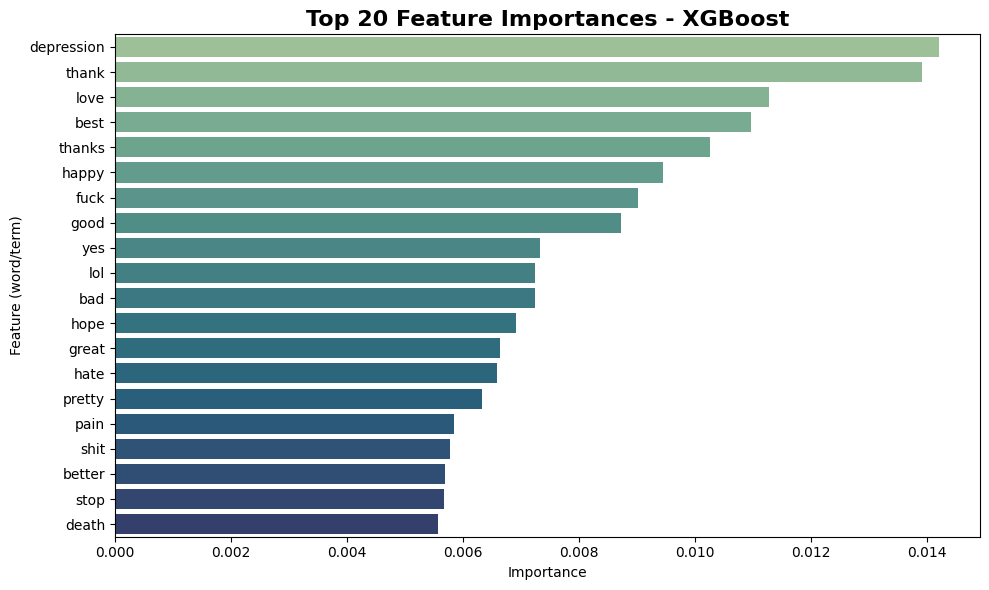

/tmp/ipython-input-745741198.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


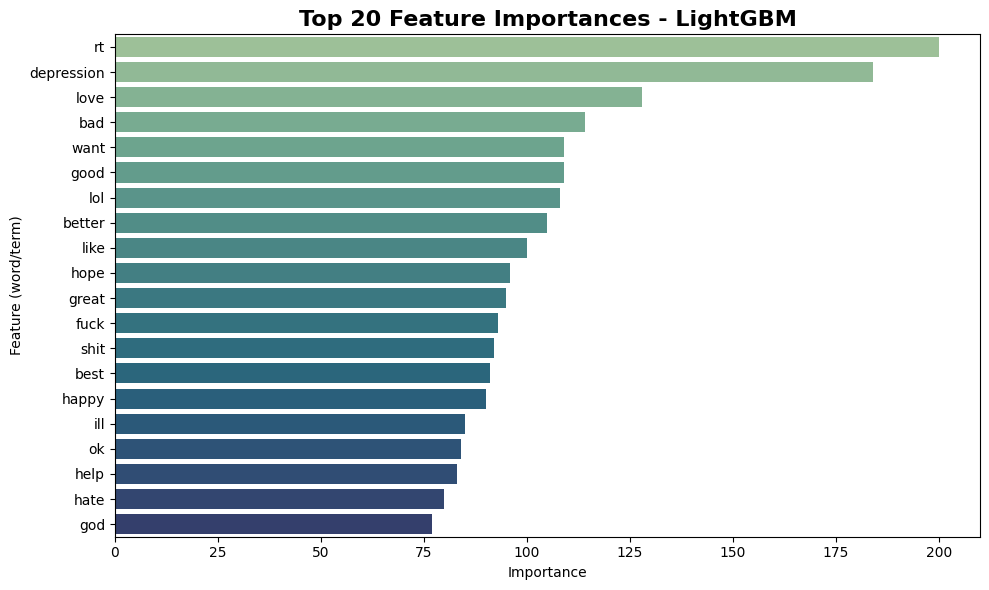

/tmp/ipython-input-745741198.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


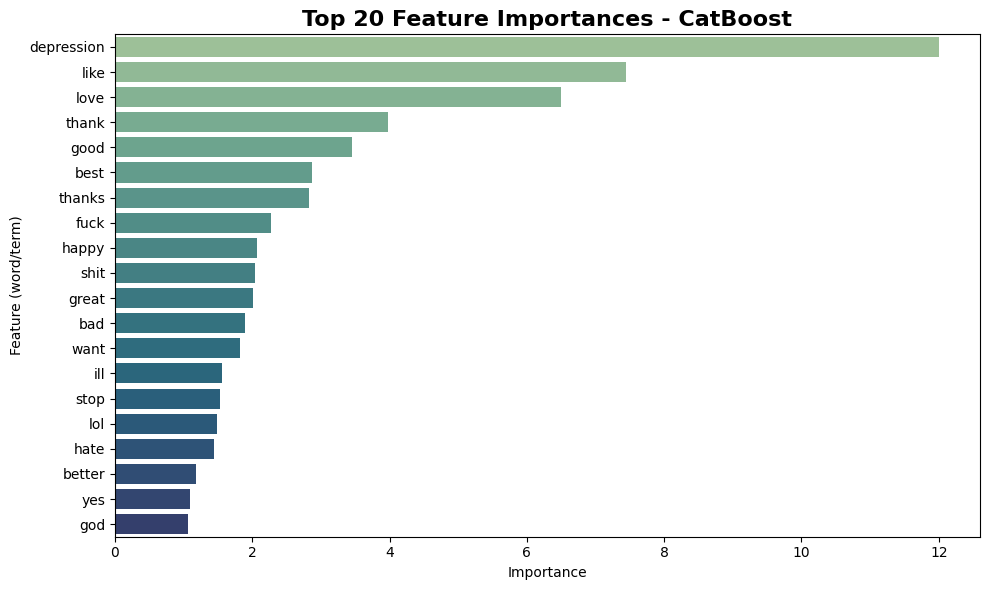

/tmp/ipython-input-745741198.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


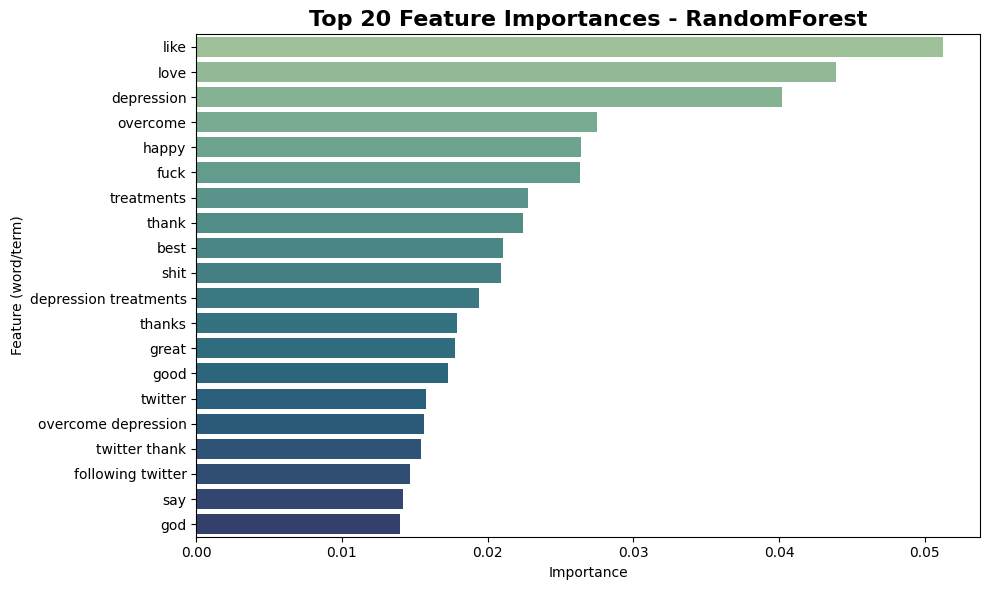

/tmp/ipython-input-745741198.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


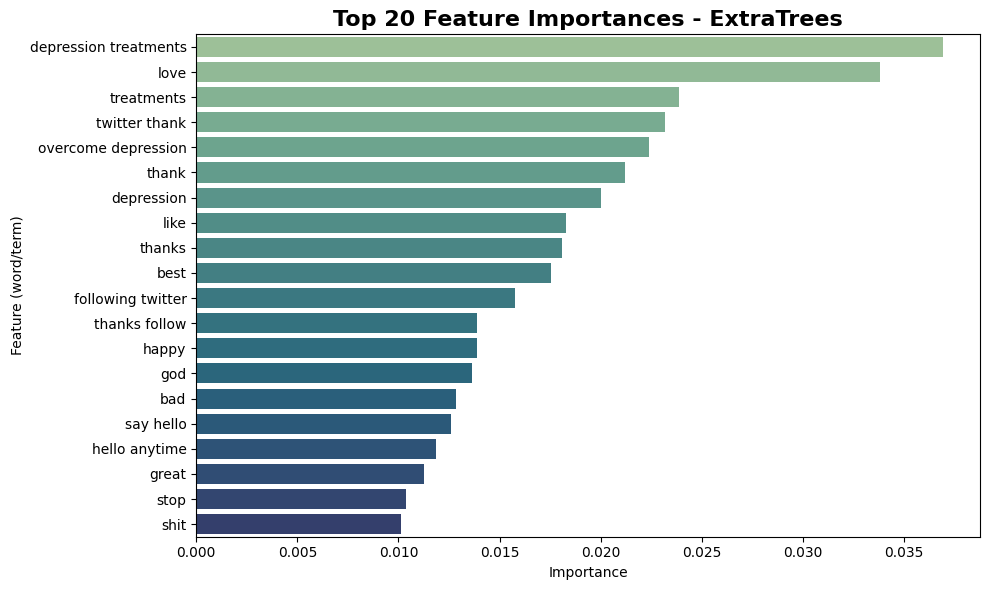

The model 'Bagging' does not have a 'feature_importances_' attribute.


In [42]:
feature_names = vectorizer.get_feature_names_out()

for name, model in models.items():
    # Not all models have feature_importances_ (e.g., Bagging may not have it)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        # Select the top N most important features
        N = 20
        indices = np.argsort(importances)[-N:][::-1]
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=importances[indices],
            y=np.array(feature_names)[indices],
            palette='crest'
        )
        plt.title(f'Top {N} Feature Importances - {name}', fontsize=16, fontweight='bold')
        plt.xlabel('Importance')
        plt.ylabel('Feature (word/term)')
        plt.tight_layout()
        plt.show()
    else:
        print(f"The model '{name}' does not have a 'feature_importances_' attribute.")


Confusion Matrix - XGBoost


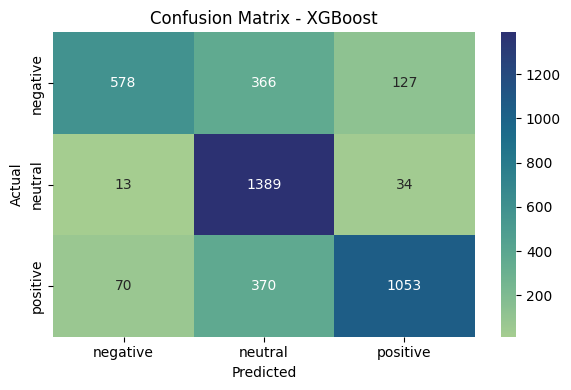


Confusion Matrix - LightGBM


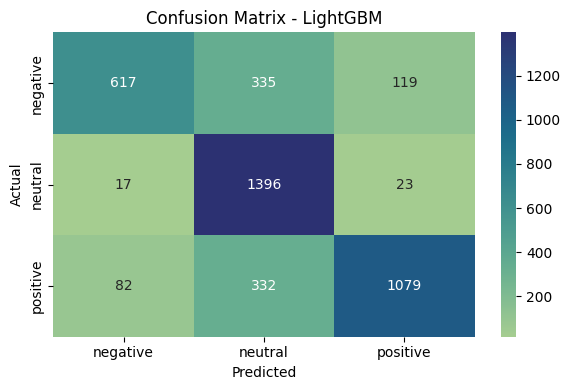


Confusion Matrix - CatBoost


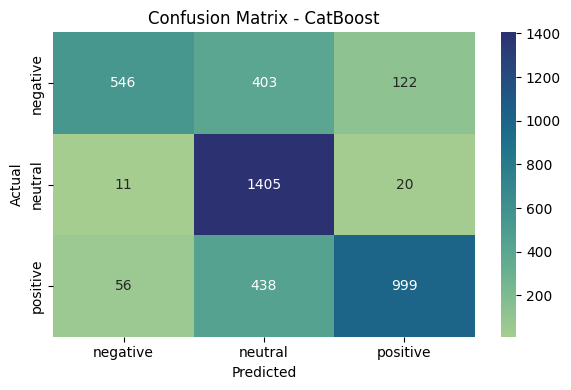


Confusion Matrix - RandomForest


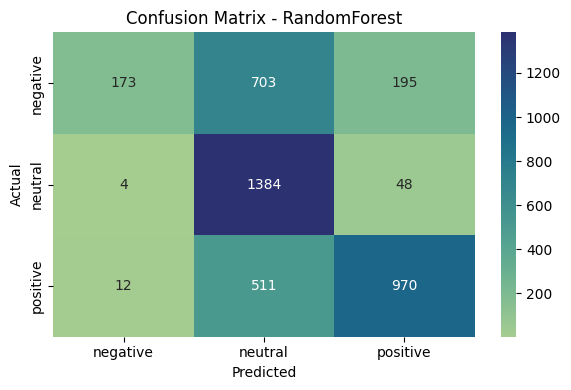


Confusion Matrix - ExtraTrees


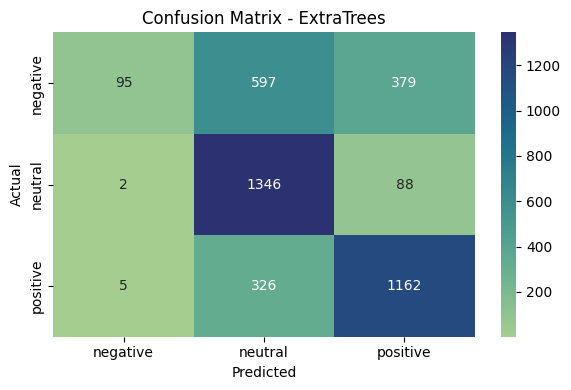


Confusion Matrix - Bagging


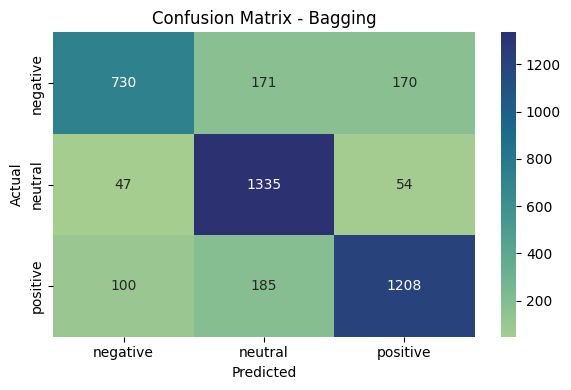

In [43]:
for name in results:
    print(f"\nConfusion Matrix - {name}")
    cm = confusion_matrix(y_test, results[name]["y_pred"], labels=range(len(le.classes_)))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

In [44]:
for name in results:
    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, results[name]["y_pred"], target_names=le.classes_))


Classification Report - XGBoost
              precision    recall  f1-score   support

    negative       0.87      0.54      0.67      1071
     neutral       0.65      0.97      0.78      1436
    positive       0.87      0.71      0.78      1493

    accuracy                           0.76      4000
   macro avg       0.80      0.74      0.74      4000
weighted avg       0.79      0.76      0.75      4000


Classification Report - LightGBM
              precision    recall  f1-score   support

    negative       0.86      0.58      0.69      1071
     neutral       0.68      0.97      0.80      1436
    positive       0.88      0.72      0.80      1493

    accuracy                           0.77      4000
   macro avg       0.81      0.76      0.76      4000
weighted avg       0.80      0.77      0.77      4000


Classification Report - CatBoost
              precision    recall  f1-score   support

    negative       0.89      0.51      0.65      1071
     neutral       0.63     

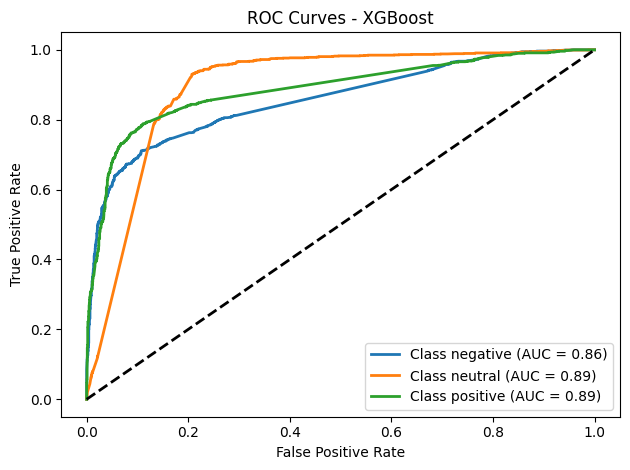

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


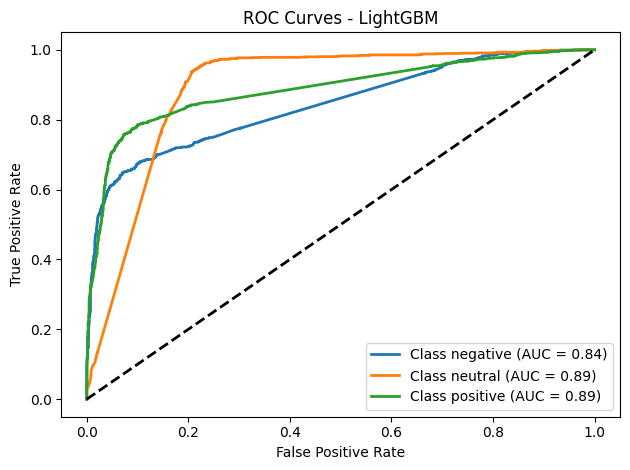

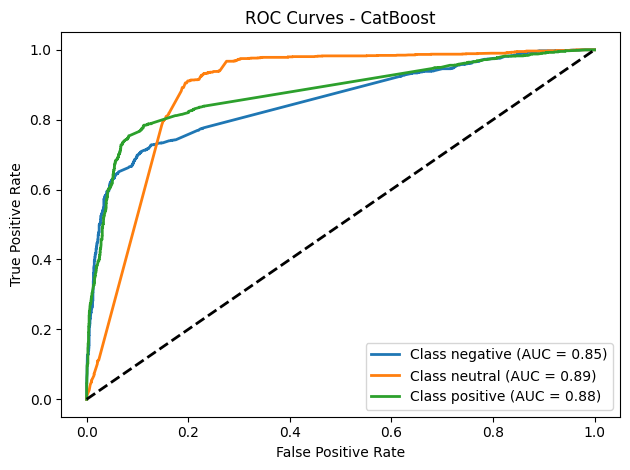

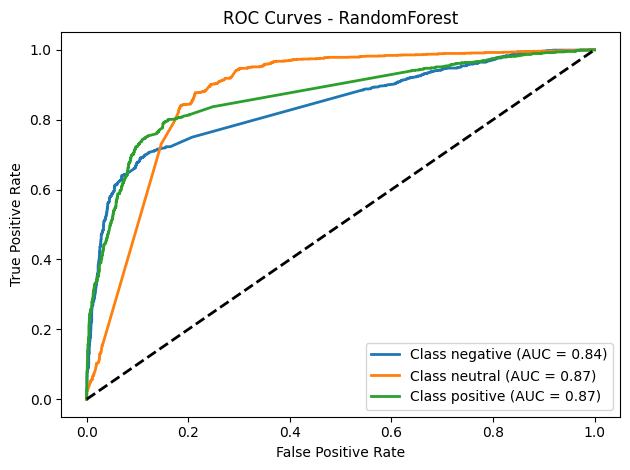

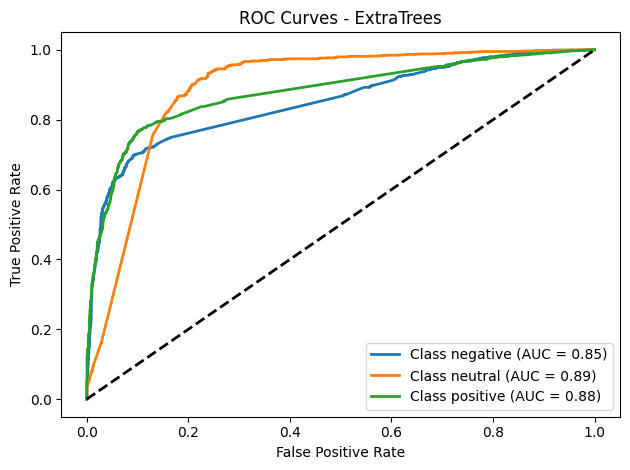

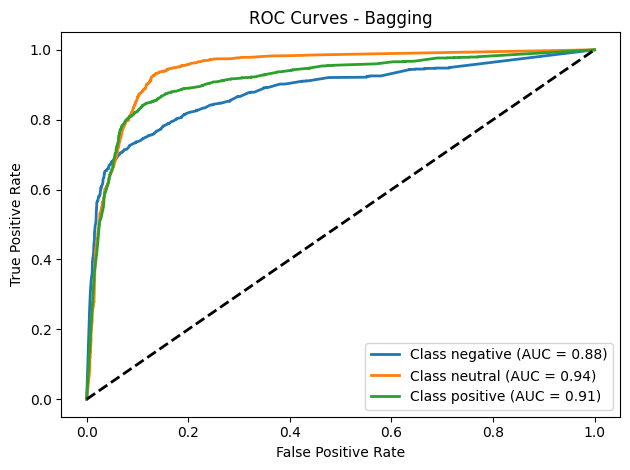

In [45]:
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

for name, model in models.items():
    if n_classes == 2:
        # For binary, use the probability of the positive class
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
        plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()
    else:
        # Multiclass: one ROC curve for each class
        y_score = model.predict_proba(X_test)
        plt.figure()
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves - {name}')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

In [46]:
depression_keywords = [
    "depression", "depressed", "depressing", "sad", "hopeless", "suicidal",
    "worthless", "tired", "fatigue", "cry", "lonely", "alone", "gloom",
    "mental illness", "can't cope", "lost", "no energy", "pain", "empty"
]

# Feature: binary presence (1/0) of at least one depression-related keyword in the text
df['has_depression_kw'] = df['cleaned_review'].str.lower().apply(
    lambda text: int(any(kw in text for kw in depression_keywords))
)

# Function to count the total occurrences of depression keywords in the text
def count_keywords(text, keywords):
    return sum(len(re.findall(r'\b{}\b'.format(re.escape(kw)), text.lower())) for kw in keywords)

# Feature: count of depression-related keywords per text
df['count_depression_kw'] = df['cleaned_review'].apply(lambda x: count_keywords(x, depression_keywords))

In [47]:
print(df[['cleaned_review', 'has_depression_kw']].head(n=20))

                                       cleaned_review  has_depression_kw
0   years since diagnosed anxiety depression today...                  1
1   sunday need break im planning spend little tim...                  0
2                  awake tired need sleep brain ideas                  1
3   rt sewhq retro bears make perfect gifts great ...                  0
4   hard say whether packing lists making life eas...                  0
5          making packing lists new hobby movinghouse                  0
6   point keeping stuff nostalgic reasons cross li...                  0
7   currently findingboxesofrandomshit packing pha...                  0
8               cant bothered cook take away way lazy                  0
9   rt itventsnews itv releases promo video final ...                  0
10           also much stuff way way much movinghouse                  0
11   never want put one together lotharderthanitlooks                  0
12  moving stuff bloomin knackering theres still l.

In [48]:
print(df[['cleaned_review', 'count_depression_kw']].head(n=20))

                                       cleaned_review  count_depression_kw
0   years since diagnosed anxiety depression today...                    1
1   sunday need break im planning spend little tim...                    0
2                  awake tired need sleep brain ideas                    1
3   rt sewhq retro bears make perfect gifts great ...                    0
4   hard say whether packing lists making life eas...                    0
5          making packing lists new hobby movinghouse                    0
6   point keeping stuff nostalgic reasons cross li...                    0
7   currently findingboxesofrandomshit packing pha...                    0
8               cant bothered cook take away way lazy                    0
9   rt itventsnews itv releases promo video final ...                    0
10           also much stuff way way much movinghouse                    0
11   never want put one together lotharderthanitlooks                    0
12  moving stuff bloomin 

In [49]:
df['word_count'] = df['cleaned_review'].str.split().str.len()

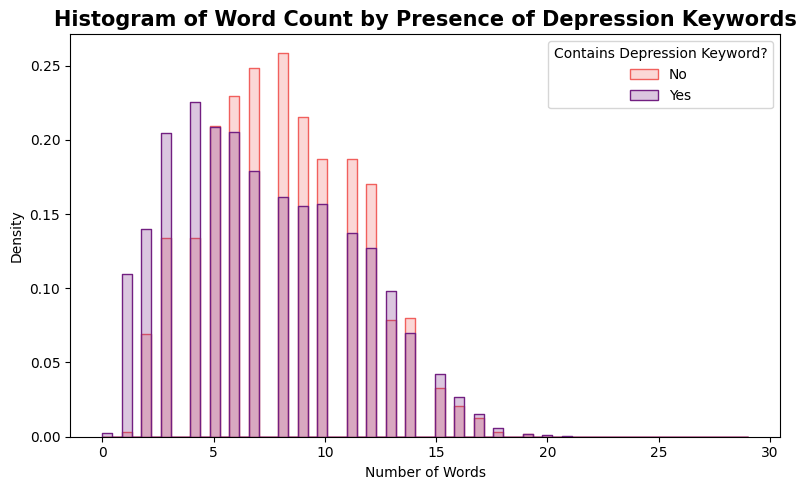

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='word_count',
    hue='has_depression_kw',
    element='step',
    stat='density',
    common_norm=False,
    palette='magma'
)
plt.title('Histogram of Word Count by Presence of Depression Keywords', fontsize=15, fontweight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend(title='Contains Depression Keyword?', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [51]:
def plot_top_cleaned_reviews(df, group_col='has_depression_kw', text_col='cleaned_review', n=15):
    def truncate(text, length=65):
        if len(text) <= length:
            return text
        cut = text[:length].rsplit(' ', 1)[0]  # Evita cortar no meio da palavra
        return cut + "..."
    groups = sorted(df[group_col].unique())
    fig, axes = plt.subplots(1, len(groups), figsize=(20,8), sharey=True, gridspec_kw={'wspace': 0.13})
    palettes = {0: sns.light_palette("blue", n, reverse=True), 1: sns.light_palette("red", n, reverse=True)}
    max_freq = 0
    for i, group in enumerate(groups):
        frases = df[df[group_col]==group][text_col]
        top_frases = frases.value_counts().head(n)
        # Crie labels únicos com índice
        top_frases_labels = [f"F{j+1}: {truncate(frase, 60)}" for j, frase in enumerate(top_frases.index)]
        max_freq = max(max_freq, top_frases.values.max())
        sns.barplot(x=top_frases.values, y=top_frases_labels, ax=axes[i], palette=palettes.get(group, "Blues_d"))
        for idx, v in enumerate(top_frases.values):
            percent = 100 * v / len(frases)
            axes[i].text(v + max_freq*0.01, idx, f"{v} ({percent:.1f}%)", color='black', va='center',
                         fontweight='bold', fontsize=13, family='monospace')
        total = len(frases.unique())
        label_nome = "Com palavra-chave" if group == 1 else "Sem palavra-chave"
        axes[i].set_title(f"{label_nome}\n{total:,} frases únicas", fontsize=18, fontweight='bold', loc='center')
        axes[i].set_xlabel('Frequência', fontsize=15, labelpad=12)
        axes[i].set_ylabel('Frases', fontsize=15, labelpad=12)
        axes[i].tick_params(axis='y', labelsize=12)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].grid(axis='x', linestyle='--', alpha=0.18)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].set_xlim(0, max_freq * 1.11)
    plt.suptitle(
        "Distribuição das Frases Mais Frequentes por Presença de Palavra-chave de Depressão",
        fontsize=25, fontweight='bold', y=0.99, color='#22223b'
    )
    plt.figtext(0.5, 0.91, "Frequências e percentuais são relativas ao total de frases em cada grupo.",
                fontsize=15, color='dimgray', ha='center', fontstyle='italic')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

/tmp/ipython-input-1555139247.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_frases.values, y=top_frases_labels, ax=axes[i], palette=palettes.get(group, "Blues_d"))
/tmp/ipython-input-1555139247.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_frases.values, y=top_frases_labels, ax=axes[i], palette=palettes.get(group, "Blues_d"))
/tmp/ipython-input-1555139247.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


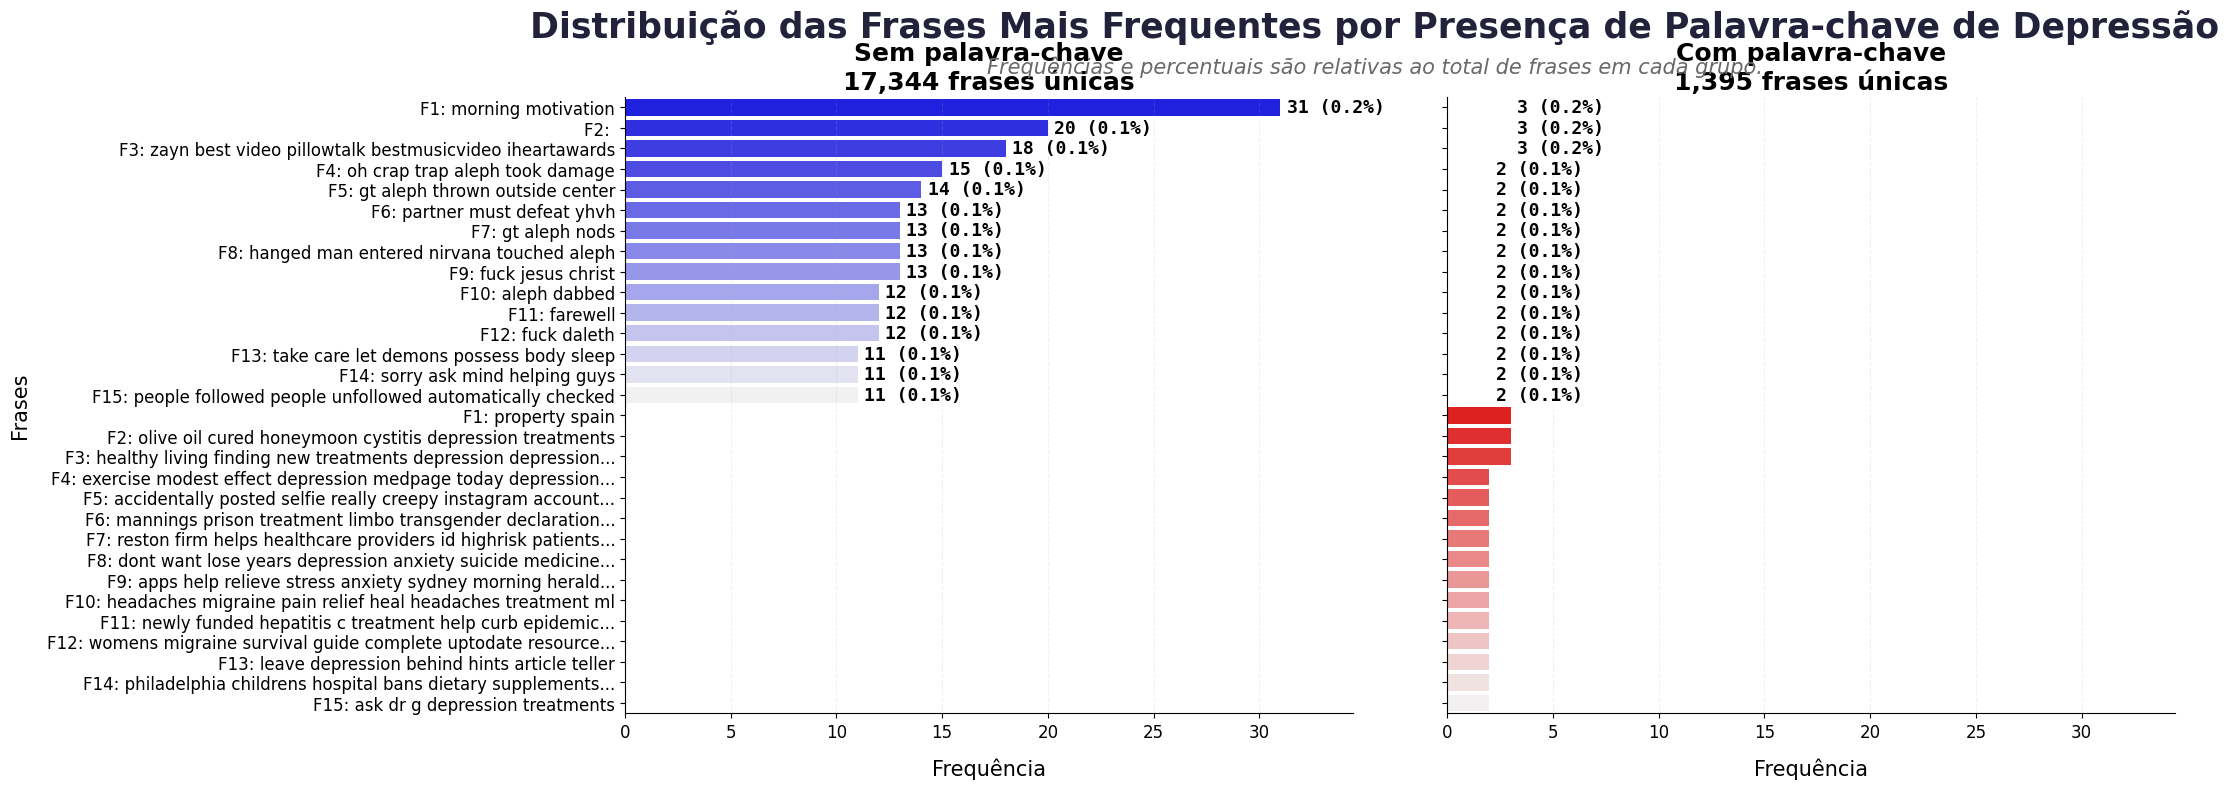

In [52]:
plot_top_cleaned_reviews(df, group_col='has_depression_kw', text_col='cleaned_review', n=15)

In [53]:
# Display the top 15 most frequent texts for each group
for group in sorted(df['has_depression_kw'].unique()):
    print(f"\nGroup {'Contains keyword' if group==1 else 'No keyword'}:")
    texts = df[df['has_depression_kw'] == group]['cleaned_review']
    top_texts = texts.value_counts().head(15)
    for idx, text in enumerate(top_texts.index):
        print(f"F{idx+1}: {text}")


Group No keyword:
F1: morning motivation
F2: 
F3: zayn best video pillowtalk bestmusicvideo iheartawards
F4: oh crap trap aleph took damage
F5: gt aleph thrown outside center
F6: partner must defeat yhvh
F7: gt aleph nods
F8: hanged man entered nirvana touched aleph
F9: fuck jesus christ
F10: aleph dabbed
F11: farewell
F12: fuck daleth
F13: take care let demons possess body sleep
F14: sorry ask mind helping guys
F15: people followed people unfollowed automatically checked

Group Contains keyword:
F1: property spain
F2: olive oil cured honeymoon cystitis depression treatments
F3: healthy living finding new treatments depression depression treatments
F4: exercise modest effect depression medpage today depression treatments
F5: accidentally posted selfie really creepy instagram account literally lost followers ugly ass
F6: mannings prison treatment limbo transgender declaration time depression treatments
F7: reston firm helps healthcare providers id highrisk patients washington post depr

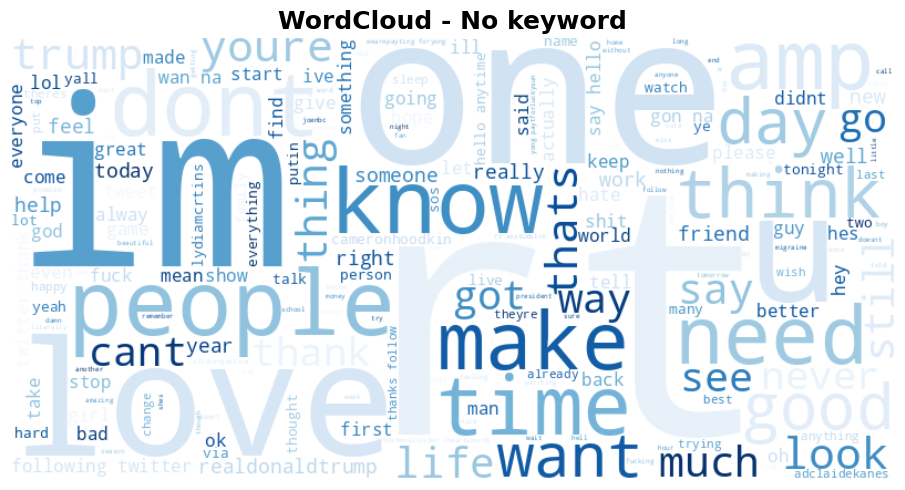

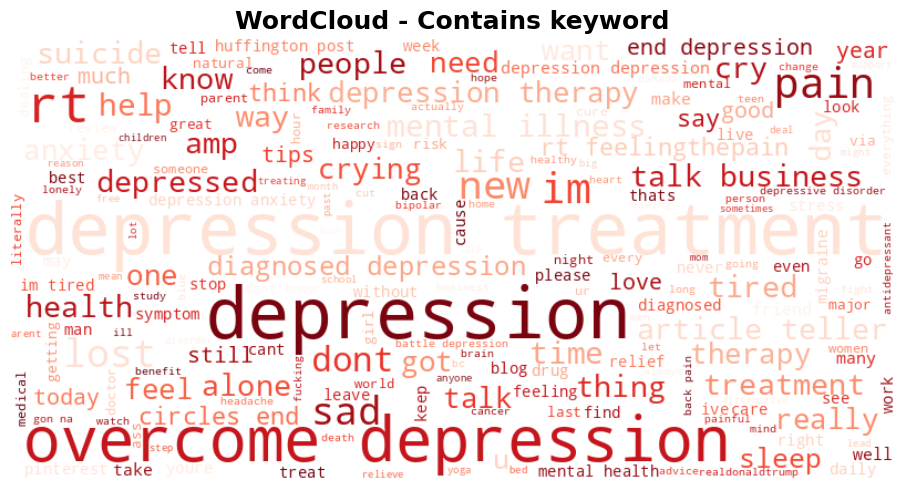

In [54]:
groups = sorted(df['has_depression_kw'].unique())
for group in groups:
    texts = df[df['has_depression_kw'] == group]['cleaned_review']
    all_text = ' '.join(texts.astype(str).tolist())
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='Blues' if group == 0 else 'Reds'
    ).generate(all_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    group_label = "Contains keyword" if group == 1 else "No keyword"
    plt.title(f'WordCloud - {group_label}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

**Feature: Count of Negative Words (using SentiWordNet or a custom negative word list)**

Extract the number of negative words present in each text, either by leveraging SentiWordNet for sentiment tagging or by using a custom-built list of negative words.

This feature can help capture the overall negativity expressed in a message, providing additional signal for depression detection.

In [55]:
negative_words = ["sad", "cry",
                  "hopeless", "pain",
                  "alone", "tired",
                  "no one", "hate",
                  "fail", "useless",
                  "pointless"]

# Feature: count the number of negative words in each text
df['count_negative_words'] = df['cleaned_review'].str.lower().apply(
    lambda text: sum(text.count(word) for word in negative_words))

In [56]:
# Display the first 20 rows of the cleaned review and their count of negative words

print(df[['cleaned_review', 'count_negative_words']].head(20))

                                       cleaned_review  count_negative_words
0   years since diagnosed anxiety depression today...                     0
1   sunday need break im planning spend little tim...                     0
2                  awake tired need sleep brain ideas                     1
3   rt sewhq retro bears make perfect gifts great ...                     0
4   hard say whether packing lists making life eas...                     0
5          making packing lists new hobby movinghouse                     0
6   point keeping stuff nostalgic reasons cross li...                     0
7   currently findingboxesofrandomshit packing pha...                     0
8               cant bothered cook take away way lazy                     0
9   rt itventsnews itv releases promo video final ...                     0
10           also much stuff way way much movinghouse                     0
11   never want put one together lotharderthanitlooks                     0
12  moving s

In [57]:
# Add the word count for each review
df['word_count'] = df['cleaned_review'].str.split().str.len()

# Feature: ratio of depression-related keywords to total word count (avoiding division by zero)
df['depression_kw_ratio'] = df.apply(
    lambda row: row['count_depression_kw'] / (row['word_count'] + 1e-6),
    axis=1
)

In [58]:
# Display the first 20 rows showing the cleaned review and depression keyword ratio
print(df[['cleaned_review', 'depression_kw_ratio']].head(20))

                                       cleaned_review  depression_kw_ratio
0   years since diagnosed anxiety depression today...             0.071429
1   sunday need break im planning spend little tim...             0.000000
2                  awake tired need sleep brain ideas             0.166667
3   rt sewhq retro bears make perfect gifts great ...             0.000000
4   hard say whether packing lists making life eas...             0.000000
5          making packing lists new hobby movinghouse             0.000000
6   point keeping stuff nostalgic reasons cross li...             0.000000
7   currently findingboxesofrandomshit packing pha...             0.000000
8               cant bothered cook take away way lazy             0.000000
9   rt itventsnews itv releases promo video final ...             0.000000
10           also much stuff way way much movinghouse             0.000000
11   never want put one together lotharderthanitlooks             0.000000
12  moving stuff bloomin 

In [59]:
# 1. Add word count for each review
df['word_count'] = df['cleaned_review'].str.split().str.len()

# 2. Calculate the depression keyword ratio
df['depression_kw_ratio'] = df.apply(
    lambda row: row['count_depression_kw'] / (row['word_count'] + 1e-6),  # 1e-6 to avoid division by zero
    axis=1
)

In [60]:
print(df[['cleaned_review', 'count_depression_kw']].head(n=25))

                                       cleaned_review  count_depression_kw
0   years since diagnosed anxiety depression today...                    1
1   sunday need break im planning spend little tim...                    0
2                  awake tired need sleep brain ideas                    1
3   rt sewhq retro bears make perfect gifts great ...                    0
4   hard say whether packing lists making life eas...                    0
5          making packing lists new hobby movinghouse                    0
6   point keeping stuff nostalgic reasons cross li...                    0
7   currently findingboxesofrandomshit packing pha...                    0
8               cant bothered cook take away way lazy                    0
9   rt itventsnews itv releases promo video final ...                    0
10           also much stuff way way much movinghouse                    0
11   never want put one together lotharderthanitlooks                    0
12  moving stuff bloomin 

Part 15 - Feature extraction Word2Vec
Modelo feature extraction Word2Vec

Leverage Word2Vec embeddings to represent each text as a dense vector based on the semantic meaning of its words. By converting each review into a vector representation, it becomes possible to capture subtle linguistic patterns and contextual similarities between texts.

This approach allows the model to go beyond simple keyword matching and consider the overall semantic content, making it especially effective for identifying messages related to depression even when explicit keywords are absent.

Word2Vec-based features can significantly enhance predictive models by providing richer information for classifying depressive vs. non-depressive posts and uncovering hidden topics and emotional nuances within the data.

In [61]:
# Tokenization: each review is converted to a list of words
sentences = df['cleaned_review'].astype(str).str.split()

In [62]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [63]:
from gensim.models import Word2Vec

# Training a Word2Vec model (you can adjust the parameters as needed)
w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1,
    epochs=10  # defina o número de epochs que deseja
)

w2v_model.build_vocab(sentences)

w2v_model.train(sentences,
                total_examples=w2v_model.corpus_count,
                epochs=10,
                report_delay=1)

(1257884, 1461890)

In [64]:
print("Most similar words to 'depression':")
w2v_model.wv.most_similar("depression", topn=20)

Most similar words to 'depression':


[('treatments', 0.9233077168464661),
 ('overcome', 0.8871632218360901),
 ('therapy', 0.7908389568328857),
 ('article', 0.7678057551383972),
 ('treatment', 0.7388150095939636),
 ('disorders', 0.7319862246513367),
 ('depressive', 0.7283198237419128),
 ('disorder', 0.7135621905326843),
 ('patients', 0.7127171754837036),
 ('teller', 0.7071728706359863),
 ('tips', 0.7043810486793518),
 ('symptoms', 0.6886993050575256),
 ('major', 0.6756308674812317),
 ('ways', 0.67090904712677),
 ('treating', 0.6681923270225525),
 ('huffington', 0.6668034791946411),
 ('risk', 0.6657674312591553),
 ('pinterest', 0.660402238368988),
 ('helps', 0.6546208262443542),
 ('guardian', 0.6533085107803345)]

In [65]:
print("\nMost similar words to 'treatment':")
w2v_model.wv.most_similar("treatment", topn=20)


Most similar words to 'treatment':


[('loss', 0.8996136784553528),
 ('relief', 0.8921869993209839),
 ('patients', 0.8852589726448059),
 ('depressive', 0.8804526925086975),
 ('disorders', 0.869584858417511),
 ('disorder', 0.8682961463928223),
 ('therapy', 0.8518117666244507),
 ('heal', 0.8462565541267395),
 ('helps', 0.8412423729896545),
 ('healthcare', 0.8406635522842407),
 ('chronic', 0.8402987122535706),
 ('overcome', 0.8402414917945862),
 ('pinterest', 0.8386511206626892),
 ('practical', 0.8384426236152649),
 ('treatments', 0.8379793167114258),
 ('fatigue', 0.833848237991333),
 ('headaches', 0.8323418498039246),
 ('linked', 0.8310627341270447),
 ('seasonal', 0.8296830058097839),
 ('reveals', 0.8287777304649353)]

In [66]:
print("\nMost similar words to 'suicide':")
w2v_model.wv.most_similar("suicide", topn=20)


Most similar words to 'suicide':


[('pinterest', 0.8438311219215393),
 ('reduce', 0.8356338143348694),
 ('symptoms', 0.832891047000885),
 ('andor', 0.8313906192779541),
 ('suggestions', 0.8306328654289246),
 ('men', 0.8301252722740173),
 ('affective', 0.8299746513366699),
 ('techniques', 0.8285353183746338),
 ('exercise', 0.8236151933670044),
 ('prone', 0.8219490647315979),
 ('hints', 0.8214266300201416),
 ('pins', 0.819857656955719),
 ('prevention', 0.8194707632064819),
 ('dealing', 0.8182716369628906),
 ('cope', 0.8169641494750977),
 ('suffering', 0.8164097666740417),
 ('acupuncture', 0.8163760900497437),
 ('promising', 0.8155116438865662),
 ('treating', 0.8149333000183105),
 ('vkool', 0.814826488494873)]

In [67]:
# Most similar words to "stress"
print("\nMost similar words to 'stress':")
w2v_model.wv.most_similar("stress", topn=20)


Most similar words to 'stress':


[('relieve', 0.905501663684845),
 ('dealing', 0.9000375270843506),
 ('herald', 0.8848631381988525),
 ('reduce', 0.8752785921096802),
 ('ways', 0.8688791990280151),
 ('severe', 0.8659854531288147),
 ('prescription', 0.8622674345970154),
 ('management', 0.8619616031646729),
 ('practical', 0.8610184192657471),
 ('prevention', 0.8607337474822998),
 ('cope', 0.8603148460388184),
 ('medicine', 0.859354555606842),
 ('exercise', 0.8584402203559875),
 ('causes', 0.8569896817207336),
 ('naturally', 0.8560494780540466),
 ('cure', 0.8553740978240967),
 ('pinterest', 0.8548583984375),
 ('diet', 0.851230800151825),
 ('reveals', 0.8503784537315369),
 ('tips', 0.8475037217140198)]

In [68]:
def similarity_to_depression(words, model):
    """
    Computes the cosine similarity between the mean embedding of a list of words
    and the embedding of the word 'depression'.
    Returns 0.0 if none of the words are in the vocabulary.
    """
    valid_words = [w for w in words if w in model.wv.key_to_index]
    if not valid_words:
        return 0.0
    vec = np.mean(model.wv[valid_words], axis=0)
    # Cosine similarity with the "depression" vector
    depression_vec = model.wv["depression"]
    return np.dot(vec, depression_vec) / (np.linalg.norm(vec) * np.linalg.norm(depression_vec) + 1e-8)

In [69]:
# Calculate similarity to the concept "depression" for each review
df['sim_depression'] = df['cleaned_review'].str.split().apply(lambda x: similarity_to_depression(x, w2v_model))

In [70]:
print(df[['cleaned_review', 'sim_depression']].head(25))

                                       cleaned_review  sim_depression
0   years since diagnosed anxiety depression today...        0.580709
1   sunday need break im planning spend little tim...        0.402970
2                  awake tired need sleep brain ideas        0.398446
3   rt sewhq retro bears make perfect gifts great ...        0.370719
4   hard say whether packing lists making life eas...        0.378953
5          making packing lists new hobby movinghouse        0.424828
6   point keeping stuff nostalgic reasons cross li...        0.430967
7   currently findingboxesofrandomshit packing pha...        0.453553
8               cant bothered cook take away way lazy        0.213897
9   rt itventsnews itv releases promo video final ...        0.398515
10           also much stuff way way much movinghouse        0.233657
11   never want put one together lotharderthanitlooks        0.264434
12  moving stuff bloomin knackering theres still l...        0.329791
13                  

In [71]:
from sklearn.decomposition import PCA

# Get all words in the vocabulary
words = list(w2v_model.wv.index_to_key)

# Extract their Word2Vec embeddings
X_emb = w2v_model.wv[words]

# Reduce dimensionality to 2D using PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X_emb)

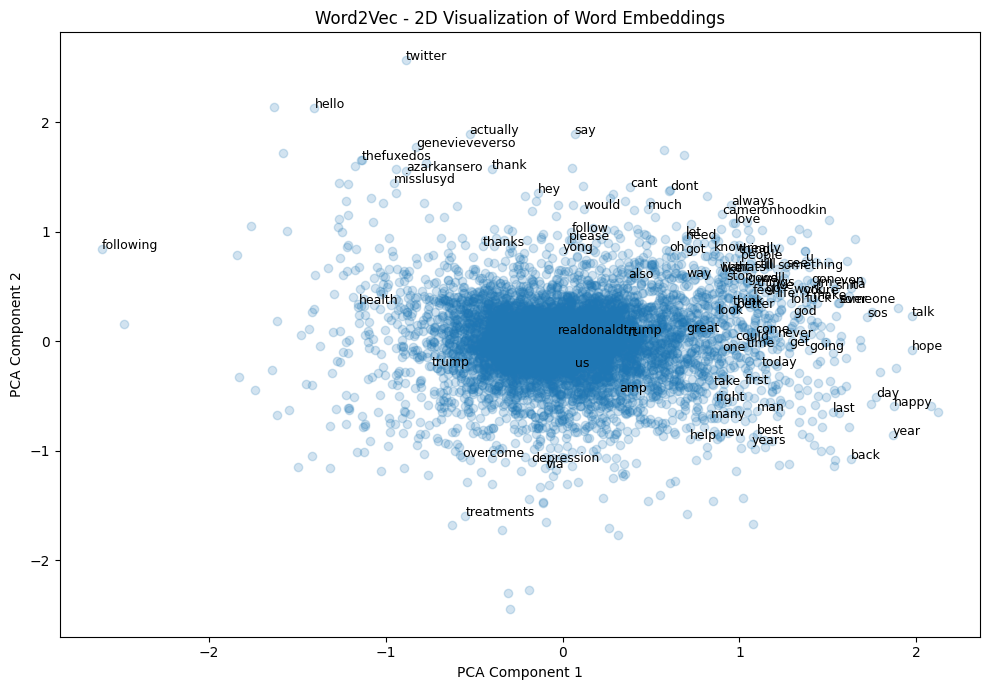

In [72]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.2)

for i, word in enumerate(words[:100]):  # Plot only the first 100 words to avoid clutter
    plt.text(X_pca[i,0], X_pca[i,1], word, fontsize=9)
plt.title("Word2Vec - 2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

In [73]:
depression_terms = [
    "depression", "depressed", "depressing", "sad", "hopeless", "suicidal",
    "worthless", "tired", "fatigue", "cry", "lonely", "alone", "gloom",
    "mental illness", "can't cope", "lost", "no energy", "pain", "empty"
]

# Now filter the terms present in the Word2Vec model
valid_terms = [w for w in depression_terms if w in w2v_model.wv]
coords = np.array([w2v_model.wv[w] for w in valid_terms])

# PCA projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(coords)

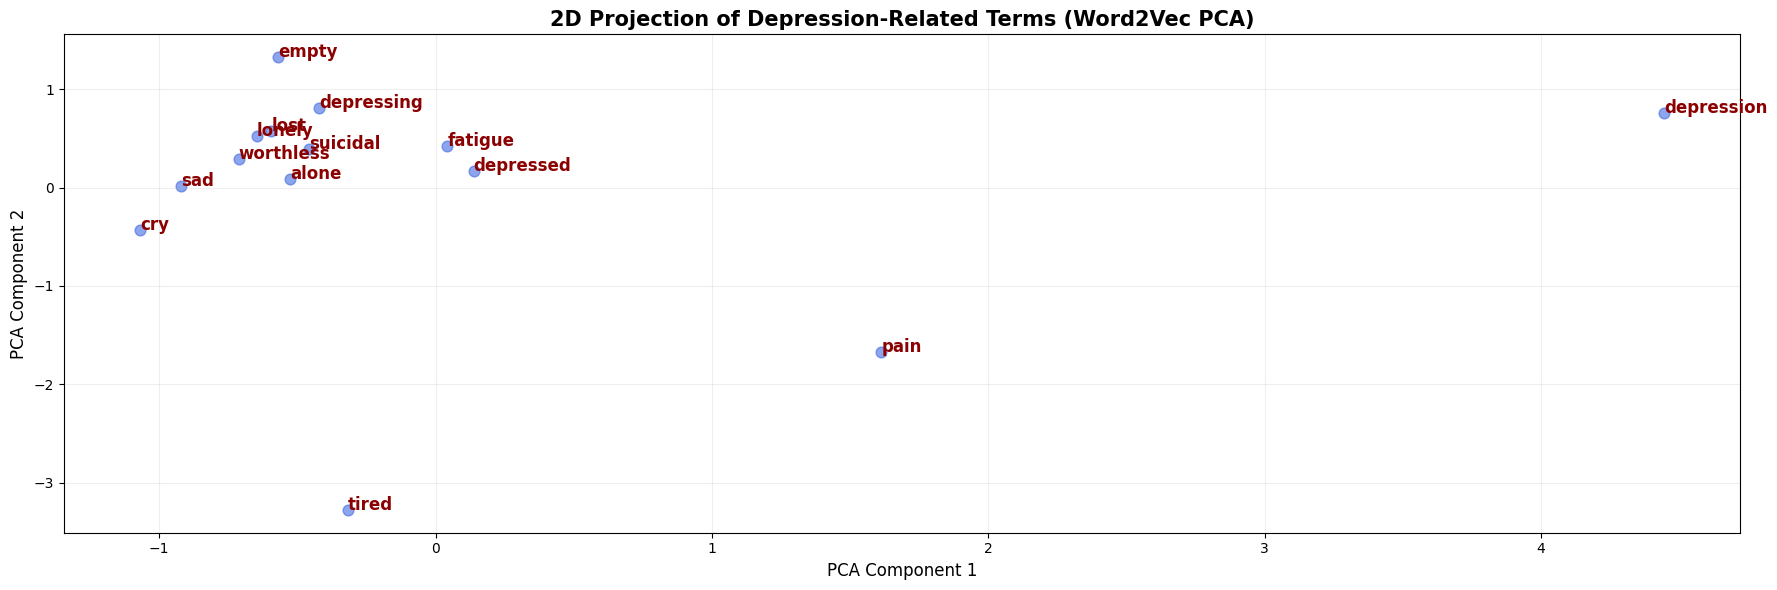

In [74]:
plt.figure(figsize=(18, 6))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1], color='royalblue', alpha=0.6, s=60)
for i, term in enumerate(valid_terms):
    plt.text(coords_2d[i, 0], coords_2d[i, 1], term, fontsize=12, fontweight='bold', color='darkred')
plt.title("2D Projection of Depression-Related Terms (Word2Vec PCA)", fontsize=15, fontweight='bold')
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [75]:
# Mean similarity score to "depression" per group (e.g., depressive vs. non-depressive)
group_scores = df.groupby('label')['sim_depression'].mean().sort_values(ascending=False)
print(group_scores)

label
1    0.391721
0    0.327367
Name: sim_depression, dtype: float64


In [76]:
label_map = {0: 'Non-depressive', 1: 'Depressive'}
df['label_group'] = df['label'].map(label_map)
group_scores = df.groupby('label_group')['sim_depression'].mean().sort_values(ascending=False)
print(group_scores)

label_group
Depressive        0.391721
Non-depressive    0.327367
Name: sim_depression, dtype: float64


In [77]:
print(df[['cleaned_review', 'sim_depression']].sort_values('sim_depression', ascending=False).head(25))

                                         cleaned_review  sim_depression
428                              celebreties depression        1.000000
1543        postpartum depression depression treatments        0.984209
1667                              depression treatments        0.982790
2012                              depression treatments        0.982790
2296                 overcome depression kratom cowtown        0.979804
850               significant undertreatment depression        0.973192
2061                   peppermint depression treatments        0.969275
1855    steps overcoming depression overcome depression        0.968958
1695  sample viagra blackhillsfox depression treatments        0.968574
1560         childless generation depression treatments        0.968413
662                                 symptoms depression        0.968273
2096            urlorganizer tags depression treatments        0.968266
1581              done depression depression treatments        0

/tmp/ipython-input-4128217519.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_scores, x='Label', y='sim_depression', palette='Blues_d')


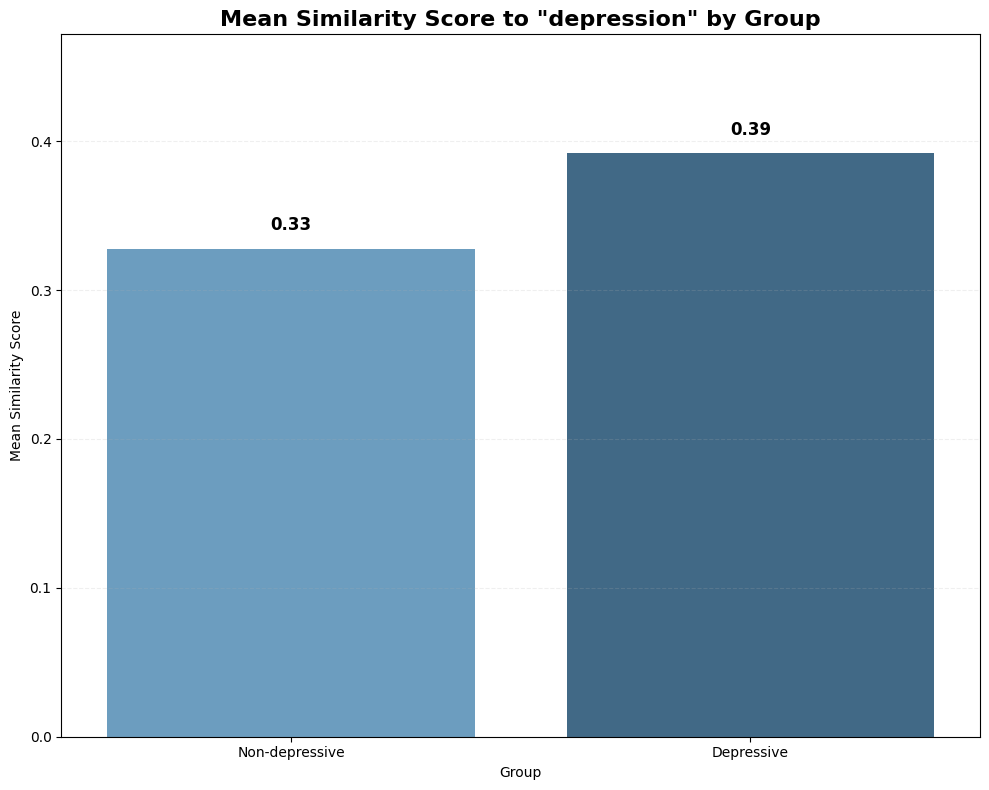

In [78]:
label_map = {0: 'Non-depressive', 1: 'Depressive'}
group_scores = df.groupby('label')['sim_depression'].mean().reset_index()
group_scores['Label'] = group_scores['label'].map(label_map)

plt.figure(figsize=(10,8))
sns.barplot(data=group_scores, x='Label', y='sim_depression', palette='Blues_d')

# Add value labels above the bars
for i, row in group_scores.iterrows():
    plt.text(i, row['sim_depression'] + 0.01, f"{row['sim_depression']:.2f}",
             ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Mean Similarity Score to "depression" by Group', fontsize=16, fontweight='bold')
plt.ylabel('Mean Similarity Score')
plt.xlabel('Group')
plt.ylim(0, group_scores['sim_depression'].max() + 0.08)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1608125697.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group', fontsize=11)


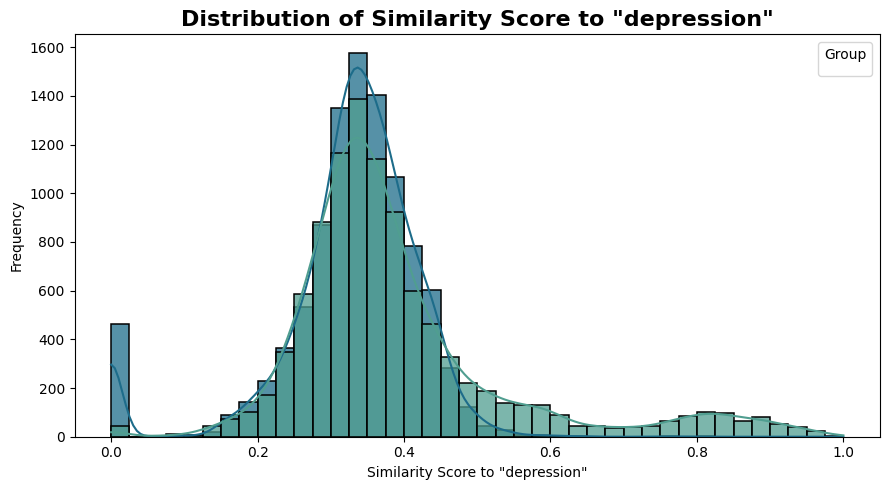

In [79]:
label_map = {0: 'Non-depressive', 1: 'Depressive'}
df['group'] = df['label'].map(label_map)

plt.figure(figsize=(9,5))

sns.histplot(data=df,
             x='sim_depression',
             bins=40,
             hue='group',           # Use descriptive group name
             kde=True,
             palette='crest',
             alpha=0.75,
             linewidth=1.1)

plt.title('Distribution of Similarity Score to "depression"', fontsize=16, fontweight='bold')
plt.xlabel('Similarity Score to "depression"')
plt.ylabel('Frequency')
plt.legend(title='Group', fontsize=11)
plt.tight_layout()
plt.show()